# Introduzione

Il codice del progetto è open source con [licenza MIT](https://github.com/OB-UNISA/Statistica/blob/master/LICENSE) ed è possibile trovarlo al seguente link: [https://github.com/OB-UNISA/Statistica](https://github.com/OB-UNISA/Statistica).
E' possibile visualizzare una versione interattiva online al seguente link: [https://datalore.jetbrains.com/view/notebook/Gw6zzI6POteIlaH1MaHRyY](https://datalore.jetbrains.com/view/notebook/Gw6zzI6POteIlaH1MaHRyY).

I dati unidimensionali esaminati sono quelli del peso corporeo nel periodo di tre anni di un uomo di età 24 attuali.  
I dati bidimensionali riguardano il peso corporeo della medesima persona nello stesso periodo e le calorie assunte giornalmente.

Il peso corporeo è stato registrato con due bilance differenti, una per il primo anno e un'altra nei restanti e quindi vi potrebbe essere una differenza di misura.  
I dati dei primi mesi sulle calorie assunte non sono molto precisi in quanto la quantità del cibo non veniva pesata, ma approssimata.

Allo stato dell'arte, importando i dati da Samsung Health, è possibile visualizzare le proprie statistiche. Questo potrebbe non funzionare in futuro se la forma dei dati venisse cambiata, ossia il parsing dei dati non funzionerebbe più. I commenti sui dati, tuttavia, risulteranno inefficienti in quanto non sono dinamici, bensì basati su un campione di esso.

Poiché i dati sono molti riguardanti il peso corporeo, circa 500, e sulle calorie assunte, quasi 1000, ne verrà preso un campione calcolato nel seguente modo:
* Per il peso corporeo, il campione sarà il peso medio delle pesate in ogni settimana.  
  Quindi x_i = peso medio nella settimana i.
* Per le calorie assunte, il campione sarà la media delle calorie assunte in ogni settimana.  
  Quindi y_i = media delle calorie assunte nella settimana i.

**Nota:** Se nella settimana i non vi sono dati sul peso, essa verrà saltata e quindi anche le rispettive calorie assunte.

Si è deciso di usare la media campionaria e non la mediana perché i picchi di valore sono importanti da considerare.

# Installazione dipendenze

In [103]:
!pip install matplotlib
!pip install pandas

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import csv

# Parsing dei dati del peso corporeo

È stato necessario arrotondare i valori del peso corporeo perché altrimenti si avrebbe avuto il numero di modalità del carattere quasi uguale all'ampiezza del dato.

In [105]:
with open('peso.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    peso = []
    reader.__next__()
    reader.__next__()
    for row in reader:
        peso.append([row[6], float(row[4])])

df_peso = pd.DataFrame(peso, columns=['data', 'peso'])
df_peso['data'] = pd.to_datetime(df_peso['data'])
df_peso = df_peso.groupby(pd.Grouper(key='data', freq='W')).mean().round(0)
df_peso

,peso
data,
2019-12-29,140.0
2020-01-05,NaN
2020-01-12,140.0
2020-01-19,NaN
2020-01-26,139.0
...,...
2022-05-08,105.0
2022-05-15,104.0
2022-05-22,104.0


Sono state eliminate le settimane in cui non vi erano dati.

In [106]:
x_not_sorted = [int(p) for p in df_peso['peso'] if not pd.isnull(p)]
x = sorted(x_not_sorted)
n = len(x)
print(f'Ampiezza del dato: {n}')
for i, x_i in enumerate(x):
    print(f'x_({i + 1})={x_i}', end=' ')

Ampiezza del dato: 115
x_(1)=102 x_(2)=102 x_(3)=103 x_(4)=103 x_(5)=103 x_(6)=103 x_(7)=103 x_(8)=103 x_(9)=103 x_(10)=103 x_(11)=103 x_(12)=104 x_(13)=104 x_(14)=104 x_(15)=104 x_(16)=104 x_(17)=104 x_(18)=104 x_(19)=104 x_(20)=104 x_(21)=105 x_(22)=105 x_(23)=105 x_(24)=105 x_(25)=105 x_(26)=105 x_(27)=105 x_(28)=105 x_(29)=105 x_(30)=105 x_(31)=106 x_(32)=106 x_(33)=106 x_(34)=106 x_(35)=106 x_(36)=107 x_(37)=107 x_(38)=108 x_(39)=108 x_(40)=108 x_(41)=109 x_(42)=109 x_(43)=110 x_(44)=111 x_(45)=111 x_(46)=112 x_(47)=112 x_(48)=113 x_(49)=114 x_(50)=115 x_(51)=116 x_(52)=117 x_(53)=117 x_(54)=117 x_(55)=117 x_(56)=117 x_(57)=117 x_(58)=117 x_(59)=118 x_(60)=118 x_(61)=118 x_(62)=118 x_(63)=118 x_(64)=118 x_(65)=118 x_(66)=119 x_(67)=120 x_(68)=121 x_(69)=121 x_(70)=121 x_(71)=121 x_(72)=122 x_(73)=122 x_(74)=122 x_(75)=122 x_(76)=122 x_(77)=123 x_(78)=124 x_(79)=124 x_(80)=125 x_(81)=125 x_(82)=125 x_(83)=126 x_(84)=126 x_(85)=126 x_(86)=126 x_(87)=126 x_(88)=127 x_(89)=127 x_(90)=

# Costruzione della tabella delle frequenze

## Calcolo delle modalità

In [107]:
v_x = [x[0]]
for i in range(1, len(x)):
    if v_x[-1] != x[i]:
        v_x.append(x[i])

for i, v_i in enumerate(v_x):
    print(f'v_{i + 1}={v_i}', end=' ')

v_1=102 v_2=103 v_3=104 v_4=105 v_5=106 v_6=107 v_7=108 v_8=109 v_9=110 v_10=111 v_11=112 v_12=113 v_13=114 v_14=115 v_15=116 v_16=117 v_17=118 v_18=119 v_19=120 v_20=121 v_21=122 v_22=123 v_23=124 v_24=125 v_25=126 v_26=127 v_27=128 v_28=129 v_29=130 v_30=131 v_31=132 v_32=133 v_33=134 v_34=135 v_35=136 v_36=137 v_37=138 v_38=139 v_39=140 

## Calcolo della frequenza assoluta delle modalità

In [108]:
f_x = [1]
for i in range(1, len(x)):
    if x[i - 1] == x[i]:
        f_x[-1] += 1
    else:
        f_x.append(1)

for i, f_i in enumerate(f_x):
    print(f'f_{i + 1}={f_i}', end=' ')

f_1=2 f_2=9 f_3=9 f_4=10 f_5=5 f_6=2 f_7=3 f_8=2 f_9=1 f_10=2 f_11=2 f_12=1 f_13=1 f_14=1 f_15=1 f_16=7 f_17=7 f_18=1 f_19=1 f_20=4 f_21=5 f_22=1 f_23=2 f_24=3 f_25=5 f_26=3 f_27=2 f_28=3 f_29=2 f_30=2 f_31=2 f_32=2 f_33=2 f_34=1 f_35=1 f_36=2 f_37=2 f_38=2 f_39=2 

## Calcolo della frequenza cumulativa assoluta delle modalità

In [109]:
F_x = [f_x[0]]
for i in range(1, len(f_x)):
    # Uso della relazione di ricorrenza
    F_x.append(F_x[-1] + f_x[i])

for i, F_i in enumerate(F_x):
    print(f'F_{i + 1}={F_i}', end=' ')

F_1=2 F_2=11 F_3=20 F_4=30 F_5=35 F_6=37 F_7=40 F_8=42 F_9=43 F_10=45 F_11=47 F_12=48 F_13=49 F_14=50 F_15=51 F_16=58 F_17=65 F_18=66 F_19=67 F_20=71 F_21=76 F_22=77 F_23=79 F_24=82 F_25=87 F_26=90 F_27=92 F_28=95 F_29=97 F_30=99 F_31=101 F_32=103 F_33=105 F_34=106 F_35=107 F_36=109 F_37=111 F_38=113 F_39=115 

## Calcolo della frequenza relativa delle modalità

In [110]:
p_x = []
for f_i in f_x:
    p_x.append(f_i / n)

for i, p_i in enumerate(p_x):
    print(f'p_{i + 1}={p_i:.3f}', end=' ')

p_1=0.017 p_2=0.078 p_3=0.078 p_4=0.087 p_5=0.043 p_6=0.017 p_7=0.026 p_8=0.017 p_9=0.009 p_10=0.017 p_11=0.017 p_12=0.009 p_13=0.009 p_14=0.009 p_15=0.009 p_16=0.061 p_17=0.061 p_18=0.009 p_19=0.009 p_20=0.035 p_21=0.043 p_22=0.009 p_23=0.017 p_24=0.026 p_25=0.043 p_26=0.026 p_27=0.017 p_28=0.026 p_29=0.017 p_30=0.017 p_31=0.017 p_32=0.017 p_33=0.017 p_34=0.009 p_35=0.009 p_36=0.017 p_37=0.017 p_38=0.017 p_39=0.017 

## Calcolo della frequenza cumulativa relativa delle modalità

In [111]:
P_x = []
for F_i in F_x:
    P_x.append(F_i / n)

for i, P_i in enumerate(P_x):
    print(f'P_{i + 1}={P_i:.3f}', end=' ')

P_1=0.017 P_2=0.096 P_3=0.174 P_4=0.261 P_5=0.304 P_6=0.322 P_7=0.348 P_8=0.365 P_9=0.374 P_10=0.391 P_11=0.409 P_12=0.417 P_13=0.426 P_14=0.435 P_15=0.443 P_16=0.504 P_17=0.565 P_18=0.574 P_19=0.583 P_20=0.617 P_21=0.661 P_22=0.670 P_23=0.687 P_24=0.713 P_25=0.757 P_26=0.783 P_27=0.800 P_28=0.826 P_29=0.843 P_30=0.861 P_31=0.878 P_32=0.896 P_33=0.913 P_34=0.922 P_35=0.930 P_36=0.948 P_37=0.965 P_38=0.983 P_39=1.000 

## Tabella delle frequenze

In [112]:
data_table = []
for i in range(len(v_x)):
    data_table.append([i + 1, v_x[i], f_x[i], p_x[i], F_x[i], P_x[i]])

df_data_table = pd.DataFrame(data_table, columns=['i', 'v_i', 'f_i', 'p_i', 'F_i', 'P_i'])
df_data_table.set_index('i', inplace=True)
df_data_table

,v_i,f_i,p_i,F_i,P_i
i,,,,,
1,102,2,0.017391,2,0.017391
2,103,9,0.078261,11,0.095652
3,104,9,0.078261,20,0.173913
4,105,10,0.086957,30,0.260870
5,106,5,0.043478,35,0.304348
6,107,2,0.017391,37,0.321739
7,108,3,0.026087,40,0.347826
8,109,2,0.017391,42,0.365217
9,110,1,0.008696,43,0.373913


# Grafici della distribuzione delle frequenze assolute

## Grafico a linee

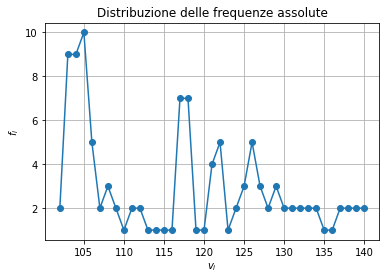

In [113]:
fig, ax = plt.subplots()
ax.plot(v_x, f_x, '-o')
ax.set_title('Distribuzione delle frequenze assolute')
ax.set_xlabel(r'$v_i$')
ax.set_ylabel(r'$f_i$')
ax.grid()

plt.show()

## Istogramma

In [114]:
def plot_histogram_classe(ampiezza_classe):
    min_value = x[0]
    max_value = x[n - 1]

    fig, ax = plt.subplots()
    values, bins, bars = ax.hist(x, bins=list(range(min_value, max_value + ampiezza_classe, ampiezza_classe)), edgecolor='black', linewidth=1.5)

    ax.set_xticks(bins)
    ax.bar_label(bars)
    ax.set_title(f'Distribuzione delle frequenze assolute con classe di ampiezza {ampiezza_classe}')
    ax.grid()
    ax.set_xlabel(r'$v_i$')
    ax.set_ylabel(r'$f_i$')

    plt.show()

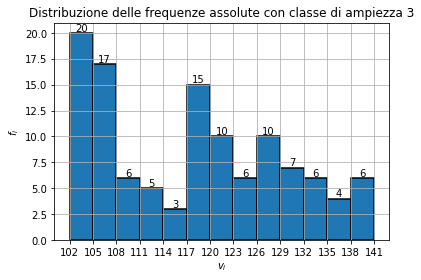

In [115]:
plot_histogram_classe(3)

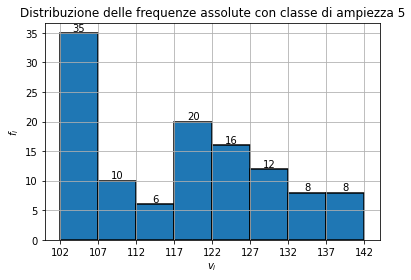

In [116]:
plot_histogram_classe(5)